In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x,y = sym.symbols("x,y",real=True)

In [3]:
z = x + sym.I*y

In [4]:
def function(x,y):
  return z**3 -1

f = function(x,y)

In [5]:
F = [sym.re(f),sym.im(f)]

In [6]:
F

[x**3 - 3*x*y**2 - 1, 3*x**2*y - y**3]

In [7]:
def GetJ(eq1,eq2,x0,y0):
  
  eq1_x = eq1.diff(x)
  eq1_y = eq1.diff(y)
  eq2_x = eq2.diff(x)
  eq2_y = eq2.diff(y)
  
  J = sym.Matrix([[eq1_x, eq1_y],
                [eq2_x, eq2_y]])

  return J

In [8]:
J = GetJ(F[0],F[1],x,y)
J

Matrix([
[3*x**2 - 3*y**2,          -6*x*y],
[          6*x*y, 3*x**2 - 3*y**2]])

In [9]:
Jn = sym.lambdify([x,y],J,"numpy")
Fn = sym.lambdify([x,y],F,"numpy")

In [10]:
def GetNewtonRaphson(F,J,x0,y0,tolerancia):
  error = tolerancia + 1
  iters = 0

  vn = np.array([0.,0.])
  
  while error > tolerancia:
    v0 = np.array([x0,y0])

    F_val = F(x0, y0)
    J_inv = np.linalg.inv(J(x0, y0))

    delta = np.dot(J_inv, F_val)
    vn = v0 - delta

    x0 = vn[0]
    y0 = vn[1]

    error = np.linalg.norm(delta)

    iters += 1

  return vn

In [11]:
N = 300
GetNewtonRaphson(Fn,Jn,0.5,0.5,1e-7)

array([-0.5      ,  0.8660254])

In [12]:
x_ = np.linspace(-1,1,N)
y_ = np.linspace(-1,1,N)

In [13]:
Fractal = np.zeros((N,N), np.int64)

In [14]:
from tqdm import tqdm
z0 = np.array([-0.5, np.sqrt(3)/2])
z1 = np.array([-0.5, -np.sqrt(3)/2])
z2 = np.array([0,1])

for i in tqdm(range(len(x_))):
  for j in range(len(y_)):
    if x_[i] != 0 and y_[j] != 0:
      z_ = GetNewtonRaphson(Fn,Jn,x_[i],y_[j],1e-7)
      if np.allclose(z0, z_ , 1e-7):
        Fractal[i,j] = 20
      elif np.allclose(z1, z_ , 1e-7):
        Fractal[i,j] = 100
      else:
        Fractal[i,j] = 255
    


100%|██████████| 300/300 [01:23<00:00,  3.58it/s]


In [15]:
Fractal

array([[100, 100, 100, ...,  20,  20,  20],
       [100, 100, 100, ...,  20,  20,  20],
       [100, 100, 100, ...,  20,  20,  20],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

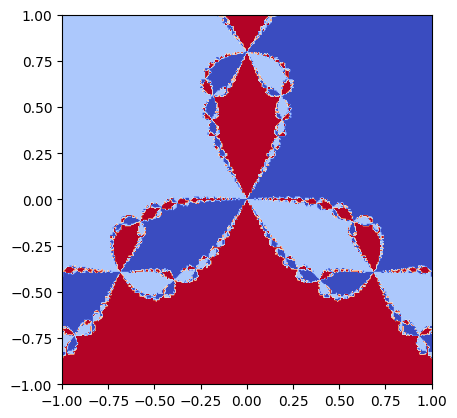

In [16]:
plt.imshow(Fractal,cmap="coolwarm",extent=[-1,1,-1,1])